# Load data

In [ ]:
import sys, os
if 'google.colab' in sys.modules:
    # mount google drive
    from google.colab import drive
    drive.mount('/content/drive')
    path_to_file = '/content/drive/MyDrive/DSA4212_Assignment2/datasets'
    print(path_to_file)
    # move to Google Drive directory
    os.chdir(path_to_file)
    !pwd

Mounted at /content/drive
/content/drive/MyDrive/DSA4212_Assignment2/datasets
/content/drive/.shortcut-targets-by-id/1sKnwfHp4YEyYFgL7Arxyl1vY9sS5U5dH/DSA4212_Assignment2/datasets


In [ ]:
from sklearn.datasets import dump_svmlight_file
import numpy as np
import pandas as pd
import os
import urllib
import zipfile
from sklearn.model_selection import train_test_split
import shutil
 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam

%matplotlib inline

ratings = pd.read_table("ratings.dat",sep = '::',header=None,engine='python',names=['user_id','movie_id',"rating","timestamp"])
users = pd.read_table("users.dat",sep = '::',header=None,engine='python',names =['user_id','gender','age','occupation','zipcode'])
movies = pd.read_table('movies.dat', sep='::', header=None, engine='python', encoding='ISO-8859-1').to_numpy()


#movies.columns = ['movie_id','title','genres']

In [ ]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [ ]:
users.head()

,user_id,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     6040 non-null   int64 
 1   gender      6040 non-null   object
 2   age         6040 non-null   int64 
 3   occupation  6040 non-null   int64 
 4   zipcode     6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [ ]:
movies

array([[1, 'Toy Story (1995)', "Animation|Children's|Comedy"],
       [2, 'Jumanji (1995)', "Adventure|Children's|Fantasy"],
       [3, 'Grumpier Old Men (1995)', 'Comedy|Romance'],
       ...,
       [3950, 'Tigerland (2000)', 'Drama'],
       [3951, 'Two Family House (2000)', 'Drama'],
       [3952, 'Contender, The (2000)', 'Drama|Thriller']], dtype=object)

In [ ]:
for i in movies:
  i[2]= i[2].split('|')

In [ ]:
genre_list = {'Action':0, 'Adventure':1, 'Animation':2, "Children's":3, 'Comedy':4, 'Crime':5, 'Documentary':6, 'Drama':7, 'Fantasy':8, 'Film-Noir':9, 'Horror':10, 'Musical':11, 'Mystery':12, 'Romance':13, 'Sci-Fi':14, 'Thriller':15, 'War':16, 'Western':17}

In [ ]:
genre_list

{'Action': 0,
 'Adventure': 1,
 'Animation': 2,
 "Children's": 3,
 'Comedy': 4,
 'Crime': 5,
 'Documentary': 6,
 'Drama': 7,
 'Fantasy': 8,
 'Film-Noir': 9,
 'Horror': 10,
 'Musical': 11,
 'Mystery': 12,
 'Romance': 13,
 'Sci-Fi': 14,
 'Thriller': 15,
 'War': 16,
 'Western': 17}

In [ ]:
for i in movies:
  for j in range(len(i[2])):
    i[2][j] = genre_list[i[2][j]]

In [ ]:
movies 

array([[1, 'Toy Story (1995)', list([2, 3, 4])],
       [2, 'Jumanji (1995)', list([1, 3, 8])],
       [3, 'Grumpier Old Men (1995)', list([4, 13])],
       ...,
       [3950, 'Tigerland (2000)', list([7])],
       [3951, 'Two Family House (2000)', list([7])],
       [3952, 'Contender, The (2000)', list([7, 15])]], dtype=object)

In [ ]:
genres = []
for i in movies:
  genre = []
  for j in range(len(i[2])):
    if j == 0:
      for k in range(i[2][j]):
        genre.append(0)
      genre.append(1)
      if j == len(i[2])-1:
        for s in range(17-i[2][j]):
          genre.append(0)
    else:
      for k in range(i[2][j]-i[2][j-1]-1):
        genre.append(0)
      genre.append(1)
      if j == len(i[2])-1:
          for s in range(17-i[2][j]):
            genre.append(0)
  genres.append(genre)

In [ ]:
genres

[[0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
for i in range(len(movies)):
  movies[i][2]=genres[i]

In [ ]:
movies

array([[1, 'Toy Story (1995)',
        list([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])],
       [2, 'Jumanji (1995)',
        list([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])],
       [3, 'Grumpier Old Men (1995)',
        list([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])],
       ...,
       [3950, 'Tigerland (2000)',
        list([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])],
       [3951, 'Two Family House (2000)',
        list([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])],
       [3952, 'Contender, The (2000)',
        list([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])]],
      dtype=object)

In [ ]:
dfs = []
for i in movies:
  movie=[]
  movie.append(i[0])
  movie.append(i[1])
  for j in range(18):
    movie.append(i[2][j])
  dfs.append(movie)

In [ ]:
movies = pd.DataFrame(dfs, columns=['movie_id','movie_title','Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'])


In [ ]:
movies

,movie_id,movie_title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents (2000),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3879,3949,Requiem for a Dream (2000),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3880,3950,Tigerland (2000),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3881,3951,Two Family House (2000),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
movies["year"] = movies["movie_title"].str[-5:-1]
movies["movie_title"] = movies["movie_title"].str[:-7]

In [ ]:
movies

,movie_id,movie_title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,1,Toy Story,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1995
1,2,Jumanji,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1995
2,3,Grumpier Old Men,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1995
3,4,Waiting to Exhale,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1995
4,5,Father of the Bride Part II,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2000
3879,3949,Requiem for a Dream,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2000
3880,3950,Tigerland,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2000
3881,3951,Two Family House,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2000


In [ ]:
users_rating=pd.merge(users,ratings,on='user_id')

In [ ]:
users_rating

,user_id,gender,age,occupation,zipcode,movie_id,rating,timestamp
0,1,F,1,10,48067,1193,5,978300760
1,1,F,1,10,48067,661,3,978302109
2,1,F,1,10,48067,914,3,978301968
3,1,F,1,10,48067,3408,4,978300275
4,1,F,1,10,48067,2355,5,978824291
...,...,...,...,...,...,...,...,...
1000204,6040,M,25,6,11106,1091,1,956716541
1000205,6040,M,25,6,11106,1094,5,956704887
1000206,6040,M,25,6,11106,562,5,956704746
1000207,6040,M,25,6,11106,1096,4,956715648


In [ ]:
dataset=pd.merge(users_rating,movies,on='movie_id')

In [ ]:
dataset

,user_id,gender,age,occupation,zipcode,movie_id,rating,timestamp,movie_title,Action,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest,0,...,0,0,0,0,0,0,0,0,0,1975
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest,0,...,0,0,0,0,0,0,0,0,0,1975
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest,0,...,0,0,0,0,0,0,0,0,0,1975
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest,0,...,0,0,0,0,0,0,0,0,0,1975
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest,0,...,0,0,0,0,0,0,0,0,0,1975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,5949,M,18,17,47901,2198,5,958846401,Modulations,0,...,0,0,0,0,0,0,0,0,0,1998
1000205,5675,M,35,14,30030,2703,3,976029116,Broken Vessels,0,...,0,0,0,0,0,0,0,0,0,1998
1000206,5780,M,18,17,92886,2845,1,958153068,White Boys,0,...,0,0,0,0,0,0,0,0,0,1999
1000207,5851,F,18,20,55410,3607,5,957756608,One Little Indian,0,...,0,0,0,0,0,0,0,0,1,1973


In [ ]:
dataset.drop(['timestamp'], axis=1,inplace=True)

In [ ]:
dataset1=dataset.drop(['zipcode','movie_title'],axis=1)

In [ ]:
dataset1.gender[dataset1.gender == 'M'] = 1
dataset1.gender[dataset1.gender == 'F'] = 0

In [ ]:
dataset1

,user_id,gender,age,occupation,movie_id,rating,Action,Adventure,Animation,Children's,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,1,0,1,10,1193,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1975
1,2,1,56,16,1193,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1975
2,12,1,25,12,1193,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1975
3,15,1,25,7,1193,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1975
4,17,1,50,1,1193,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,5949,1,18,17,2198,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1998
1000205,5675,1,35,14,2703,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1998
1000206,5780,1,18,17,2845,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1999
1000207,5851,0,18,20,3607,5,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1973


In [ ]:
dataset1.user_id = dataset1.user_id.astype('category').cat.codes.values
dataset1.movie_id = dataset1.movie_id.astype('category').cat.codes.values

In [ ]:
train, test = train_test_split(dataset1, test_size=0.1)

In [ ]:
n_users, n_movies = len(dataset1.user_id.unique()), len(dataset1.movie_id.unique())


In [ ]:
keras.backend.clear_session()

movie_input = keras.layers.Input(shape=[1],name='Movie')

movie_embedding = keras.layers.Embedding(n_movies + 1, 20, name='Movie-Embedding')(movie_input)
movie_vec = keras.layers.Flatten(name='FlattenMovies')(movie_embedding)
 
user_input = keras.layers.Input(shape=[1],name='User')
user_vec = keras.layers.Flatten(name='FlattenUsers')(keras.layers.Embedding(n_users + 1,20,name='User-Embedding')(user_input))
 
prod = keras.layers.dot([movie_vec, user_vec], axes=1,name='DotProduct')
model = keras.Model([user_input, movie_input], prod)

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Movie (InputLayer)             [(None, 1)]          0           []                               
                                                                                                  
 User (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 Movie-Embedding (Embedding)    (None, 1, 20)        74140       ['Movie[0][0]']                  
                                                                                                  
 User-Embedding (Embedding)     (None, 1, 20)        120820      ['User[0][0]']                   
                                                                                              

In [ ]:
history=model.fit([train['user_id'], train['movie_id']], train.rating, batch_size=32, epochs=30, verbose=1)

Epoch 1/30
28131/28131 [==============================] - 106s 4ms/step - loss: 0.9236 - mae: 0.7569 - mse: 0.9236
Epoch 2/30
28131/28131 [==============================] - 108s 4ms/step - loss: 0.8617 - mae: 0.7316 - mse: 0.8617
Epoch 3/30
28131/28131 [==============================] - 102s 4ms/step - loss: 0.8042 - mae: 0.7048 - mse: 0.8042
Epoch 4/30
28131/28131 [==============================] - 102s 4ms/step - loss: 0.7591 - mae: 0.6828 - mse: 0.7591
Epoch 5/30
28131/28131 [==============================] - 101s 4ms/step - loss: 0.7199 - mae: 0.6634 - mse: 0.7199
Epoch 6/30
28131/28131 [==============================] - 103s 4ms/step - loss: 0.6884 - mae: 0.6473 - mse: 0.6884
Epoch 7/30
28131/28131 [==============================] - 100s 4ms/step - loss: 0.6642 - mae: 0.6348 - mse: 0.6642
Epoch 8/30
28131/28131 [==============================] - 100s 4ms/step - loss: 0.6459 - mae: 0.6253 - mse: 0.6459
Epoch 9/30
28131/28131 [==============================] - 99s 4ms/step - loss: 0

In [ ]:
model.predict([train.user_id[:3], train.movie_id[:3]])

array([[2.2125165],
       [4.10653  ],
       [3.772138 ]], dtype=float32)

In [ ]:
train.rating[:3]

943755    1
311661    4
242849    3
Name: rating, dtype: int64

Text(0, 0.5, 'Training Error')

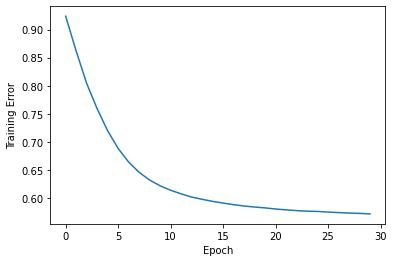

In [ ]:
pd.Series(history.history['loss']).plot()
plt.xlabel("Epoch")
plt.ylabel("Training Error")

In [ ]:
results = model.evaluate((test.user_id, test.movie_id), test.rating, batch_size=1)

100021/100021 [==============================] - 173s 2ms/step - loss: 0.8911 - mae: 0.7280 - mse: 0.8911


In [ ]:
movie_embedding_learnt = model.get_layer(name='Movie-Embedding').get_weights()[0]

In [ ]:
user_embedding_learnt = model.get_layer(name='User-Embedding').get_weights()[0]

In [ ]:
def recommend(user_id, number_of_movies=5):
  movies = user_embedding_learnt[user_id]@movie_embedding_learnt.T
  mids = np.argpartition(movies, -number_of_movies)[-number_of_movies:]
  return mids

In [ ]:
recommend(user_id=1)

array([ 892,  346, 1437, 2750, 2238])